<a href="https://colab.research.google.com/github/dev02chandan/Signal-and-Image-Processing/blob/main/7_Ideal_and_Butterworth_Filter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aim: 

    a.	Implement suitable frequency domain Butterworth filter to blur the given test image
    b.	Change the filter order and summarize your findings when the filter order increases


### Preprocessing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("/content/test.tif", 0)

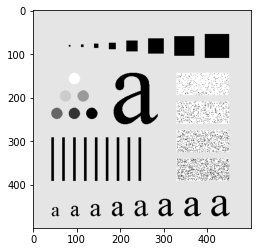

In [3]:
plt.imshow(img, cmap="gray")

In the Spatial domain - we use convolution, but instead we will convert to frequency domain by applying DFT and then we can use directly Multiplication to apply filter

In [4]:
# Applying Fourier Transform on the original image
img_fft = np.fft.fft2(img, s=None, axes=(-2,-1), norm=None)
# we use fft.fft2 because we are performing operations on a 2D array
# norm = type of FFT applied (we are taking default value)

In [5]:
# Here we are applying shifting to the origin
# We can apply shifting before or after tranformation
# Equivalent to multiplying (-1)^(x+y)
img_fft = np.fft.fftshift(img_fft)

### a. Ideal Filter - Low and High Pass

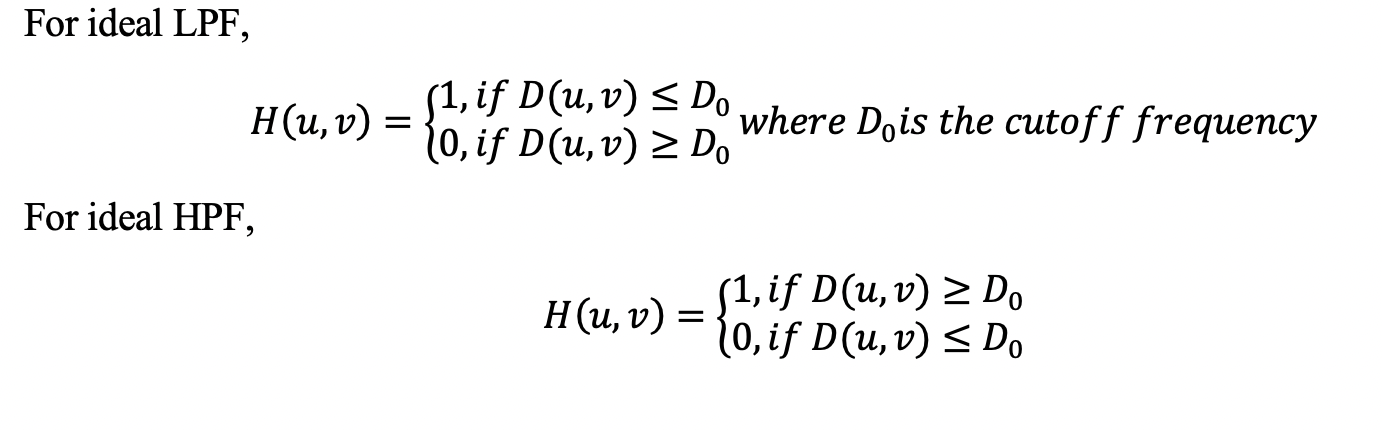

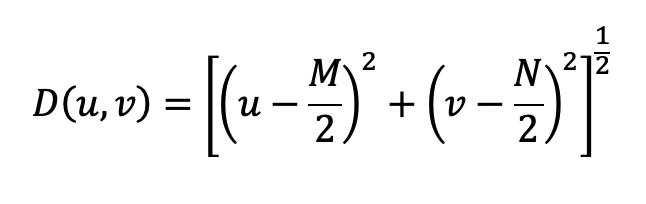

In the above Expressions, D0 is the radius.

u, v vary from 0 to m-1 and n-1 respectively

In [6]:
LPF = img.copy() # copying the size of image for filter
HPF = img.copy() 

In [7]:
D0 = int(input("Enter the Value of D0: "))

Enter the Value of D0: 30


In [8]:
(row, col) = img.shape
print(row,col)

500 500


In [9]:
for i in range(row):
    for j in range(col):
        D1 = np.sqrt((i-row//2)**2 + (j-col//2)**2)
        if D1>D0: 
            LPF[i][j] = 0
            HPF[i][j] = 1
        
        else:
            LPF[i][j] = 1
            HPF[i][j] = 0

In [10]:
# Applying the filters on the images - Direct Multiplication
# Because we are in frequency domain
img_lpf = img_fft*LPF
img_hpf = img_fft*HPF

In [11]:
# Shifting the origin
img_lpf = np.fft.fftshift(img_lpf)
img_hpf = np.fft.fftshift(img_hpf)

In [12]:
# Applying Inverse Fourier Transform to get the image back to Spatial domain
img_new_lpf = np.real(np.fft.ifft2(img_lpf))
img_new_hpf = np.real(np.fft.ifft2(img_hpf))

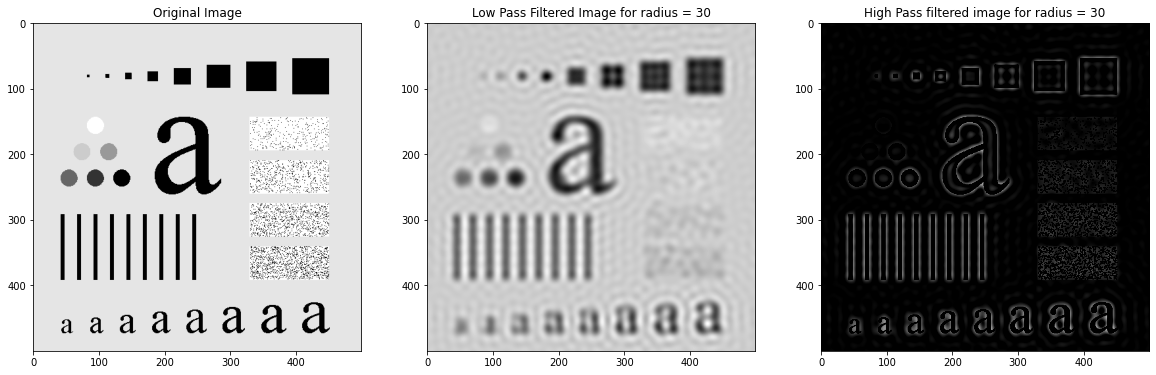

In [13]:
plt.figure(figsize=(20,20)) 

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")

plt.subplot(1,3,2)
plt.title("Low Pass Filtered Image for radius = " +str(D0))
plt.imshow(img_new_lpf,cmap="gray")

plt.subplot(1,3,3)
plt.title("High Pass filtered image for radius = " +str(D0))
plt.imshow(img_new_hpf,cmap="gray", vmin=0, vmax=255)

We Observe here that for **Low pass filtering** the image gets blurred. But we see some **Ringing Effect**. 
This problem is solved using the Butterworth filter.

For **High Pass filtering**, we see that there is precise edge detection. This is because the edges have high frequency, while other parts of the image are low frequency

#### Function for Ideal Filter

In [14]:
def ideal_filter(img, D0):

    # Pre-processing
    img_fft = np.fft.fft2(img, s=None, axes=(-2,-1), norm=None)
    img_fft = np.fft.fftshift(img_fft)

    LPF = img.copy() # copying the size of image for filter
    HPF = img.copy()
    (row, col) = img.shape

    # Create Filter
    for i in range(row):
        for j in range(col):
            D1 = np.sqrt((i-row//2)**2 + (j-col//2)**2)
            if D1>D0: 
                LPF[i][j] = 0
                HPF[i][j] = 1
        
            else:
                LPF[i][j] = 1
                HPF[i][j] = 0
    
    # Applying the filters on the images - Direct Multiplication (freq domain)
    img_lpf = img_fft*LPF
    img_hpf = img_fft*HPF

    # Shifting the origin
    img_lpf = np.fft.fftshift(img_lpf)
    img_hpf = np.fft.fftshift(img_hpf)

    # Applying Inverse Fourier Transform to get the image back to Spatial domain
    img_new_lpf = np.real(np.fft.ifft2(img_lpf))
    img_new_hpf = np.real(np.fft.ifft2(img_hpf))

    # Plot the Images
    plt.figure(figsize=(20,20)) 

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(img,cmap="gray")

    plt.subplot(1,3,2)
    plt.title("Low Pass Filtered Image for radius = " + str(D0))
    plt.imshow(img_new_lpf,cmap="gray")

    plt.subplot(1,3,3)
    plt.title("High Pass filtered image for radius = " + str(D0))
    plt.imshow(img_new_hpf,cmap="gray", vmin=0)

#### D0 = 10

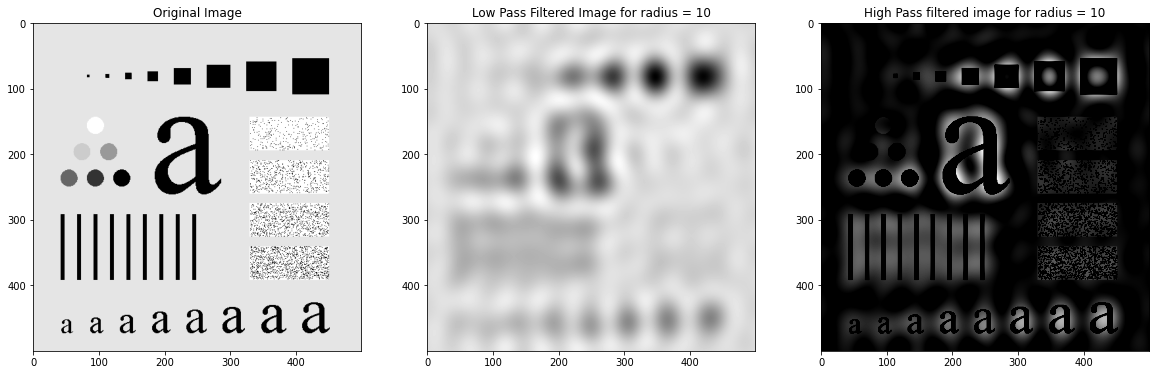

In [15]:
ideal_filter(img, 10)

#### D0 = 30

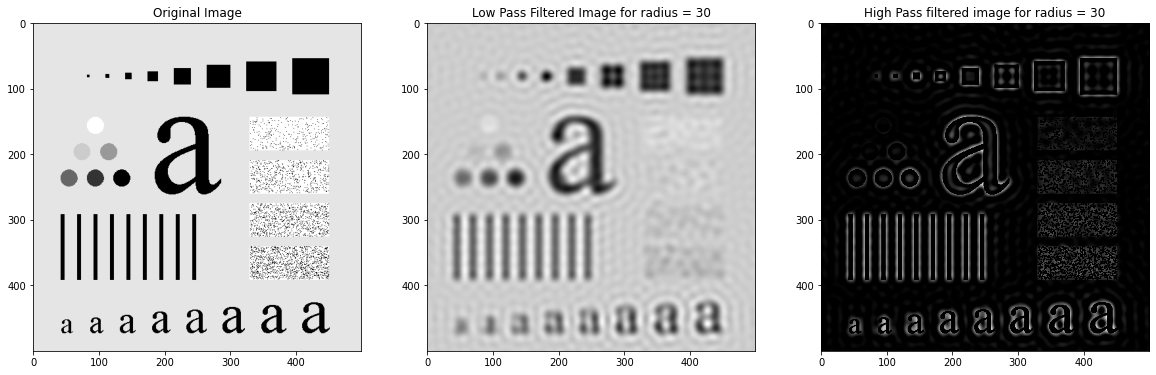

In [16]:
ideal_filter(img, 30)

#### D0 = 160

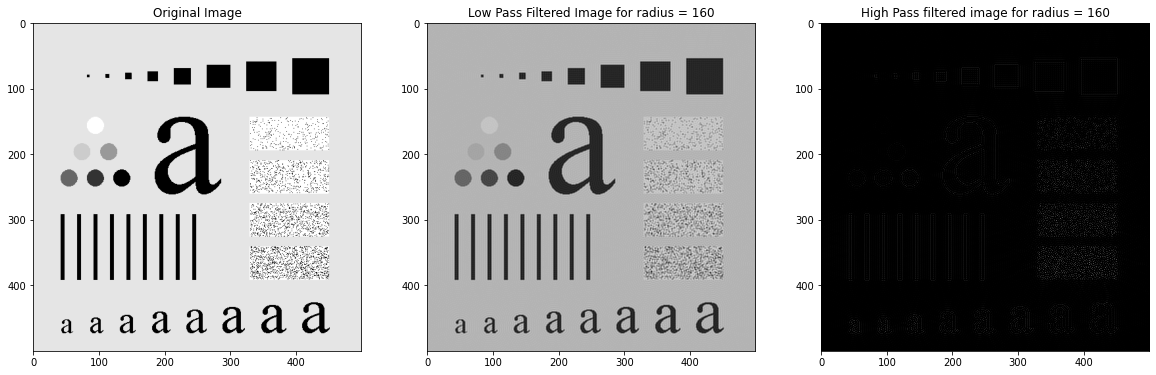

In [17]:
ideal_filter(img, 160)

### b. Butterworth Filter

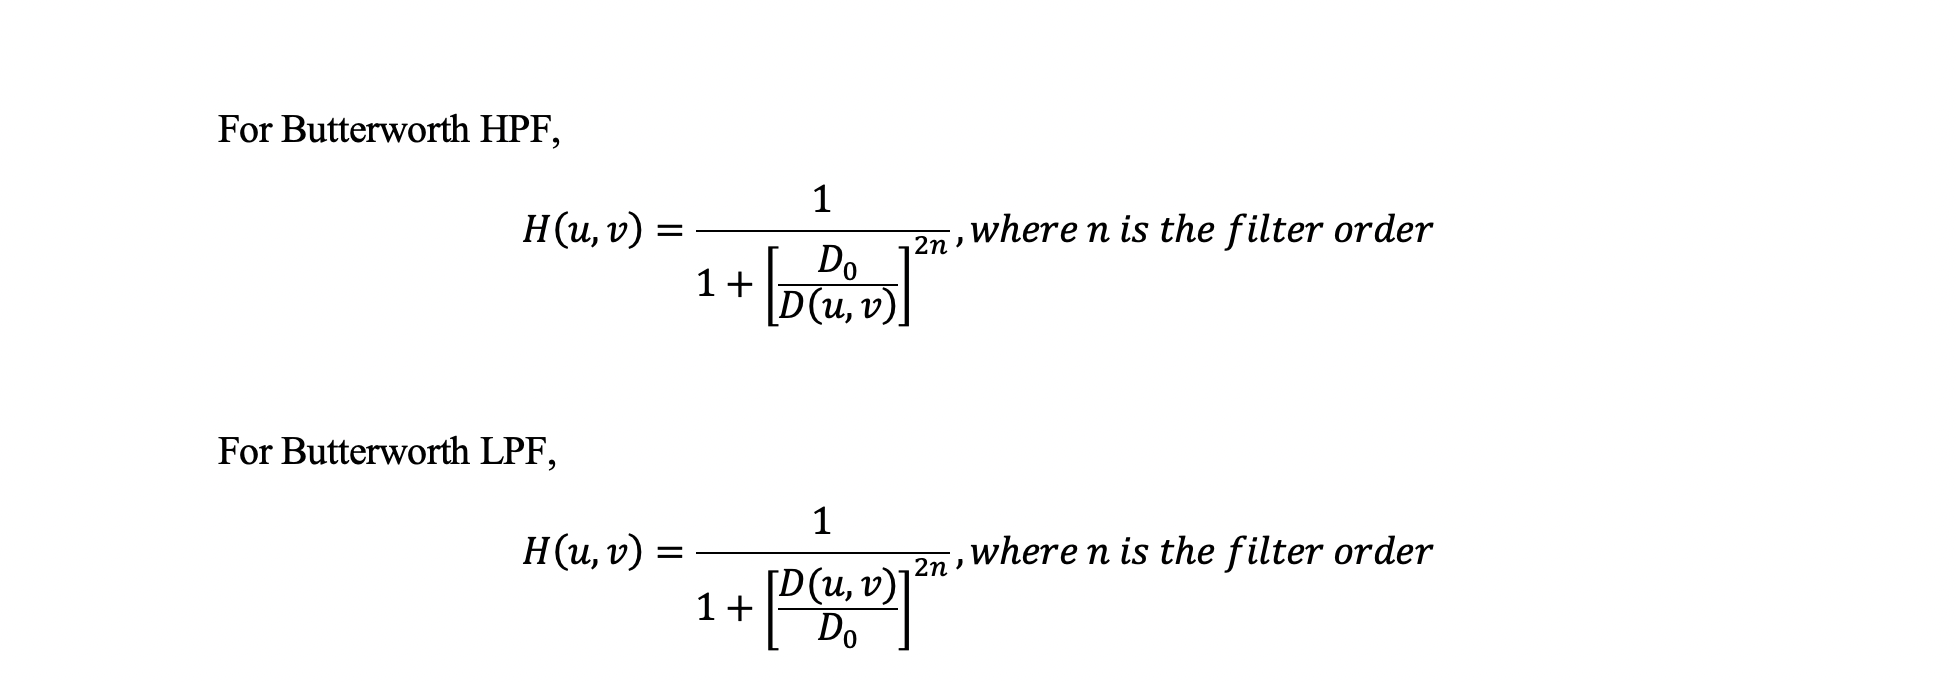

In [18]:
img=img.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [19]:
# Making copy of the image
lpf1 = img.copy()
hpf1 = img.copy()

In [20]:
# We are taking the value of n as 1
n = 1

In [21]:
D0 = int(input("Enter the value of D0: "))

Enter the value of D0: 30


In [22]:
for i in range(row):
    for j in range(col):
        D1 = np.sqrt((i-row//2)**2 + (j-col//2)**2)
        lpf1[i,j]=1/(1+(D1/D0)**(2*n))
        hpf1[i,j]=1/(1+(D0/D1)**(2*n))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [23]:
img_lpf1 = img_fft*lpf1
img_hpf1 = img_fft*hpf1

In [24]:
img_lpf1 = np.fft.fftshift(img_lpf1)
img_hpf1 = np.fft.fftshift(img_hpf1)

In [25]:
img_new_lpf1 = np.real(np.fft.ifft2(img_lpf1))
img_new_hpf1 = np.real(np.fft.ifft2(img_hpf1))

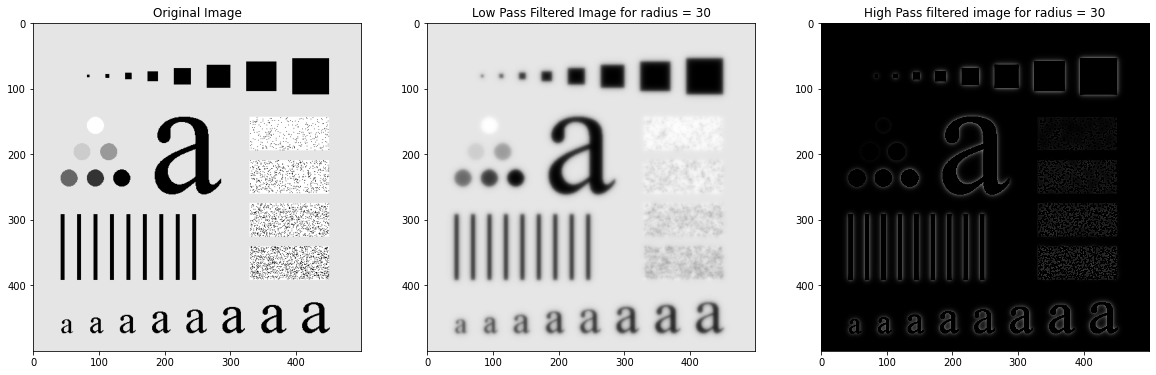

In [26]:
plt.figure(figsize=(20,20)) 

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")

plt.subplot(1,3,2)
plt.title("Low Pass Filtered Image for radius = " +str(D0))
plt.imshow(img_new_lpf1 ,cmap="gray")

plt.subplot(1,3,3)
plt.title("High Pass filtered image for radius = " +str(D0))
plt.imshow(img_new_hpf1 ,cmap="gray", vmin=0, vmax=255)

#### Function for Butterworth Filter

In [27]:
def ButterWorth_Filter(img, D0, n=1):

    # Pre-processing
    img_fft = np.fft.fft2(img, s=None, axes=(-2,-1), norm=None)
    img_fft = np.fft.fftshift(img_fft)

    img=img.astype(np.float)

    # Making copy of the image
    lpf1 = img.copy()
    hpf1 = img.copy()
    (row, col) = img.shape

    # Create Filter
    for i in range(row):
        for j in range(col):
            D1 = np.sqrt((i-row//2)**2 + (j-col//2)**2)
            lpf1[i,j]=1/(1+(D1/D0)**(2*n))
            hpf1[i,j]=1/(1+(D0/D1)**(2*n))
    
    # Applying the filters on the images - Direct Multiplication (freq domain)
    img_lpf1 = img_fft*lpf1
    img_hpf1 = img_fft*hpf1 

    # Shifting the origin
    img_lpf1 = np.fft.fftshift(img_lpf1)
    img_hpf1 = np.fft.fftshift(img_hpf1)

    # Applying Inverse Fourier Transform to get the image back to Spatial domain
    img_new_lpf1 = np.real(np.fft.ifft2(img_lpf1))
    img_new_hpf1 = np.real(np.fft.ifft2(img_hpf1))

    # Plot the Images
    plt.figure(figsize=(20,20)) 

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(img,cmap="gray")

    plt.subplot(1,3,2)
    plt.title("Low Pass Filtered Image for radius = " +str(D0))
    plt.imshow(img_new_lpf1 ,cmap="gray")

    plt.subplot(1,3,3)
    plt.title("High Pass filtered image for radius = " +str(D0))
    plt.imshow(img_new_hpf1 ,cmap="gray", vmin=0, vmax=255)

#### D0 = 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


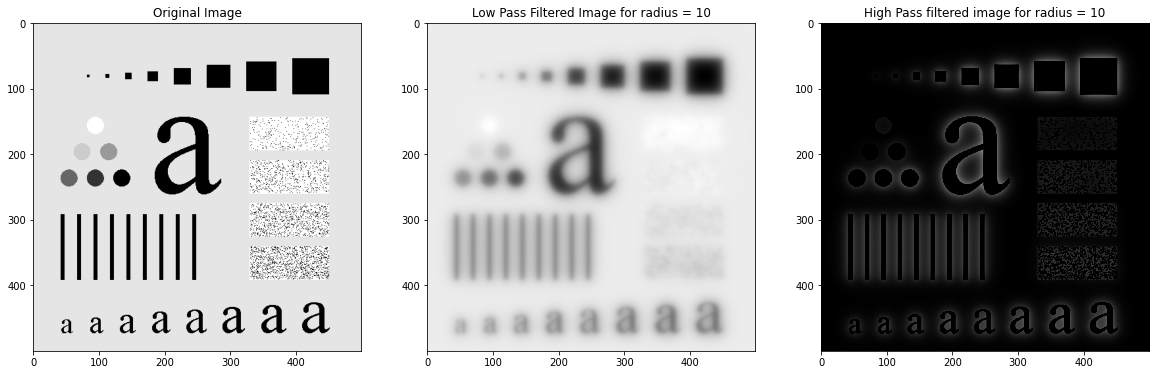

In [28]:
ButterWorth_Filter(img, 10)

#### D0 = 30

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


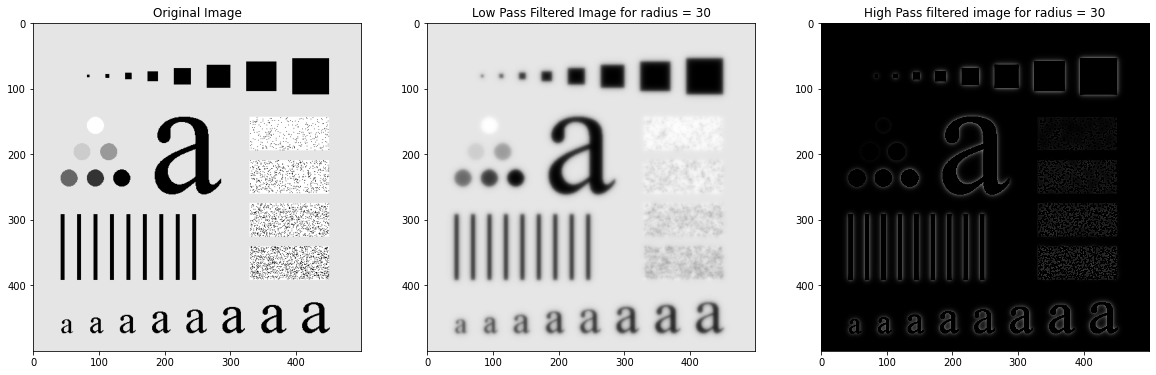

In [29]:
ButterWorth_Filter(img, 30)

#### D0 = 160


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


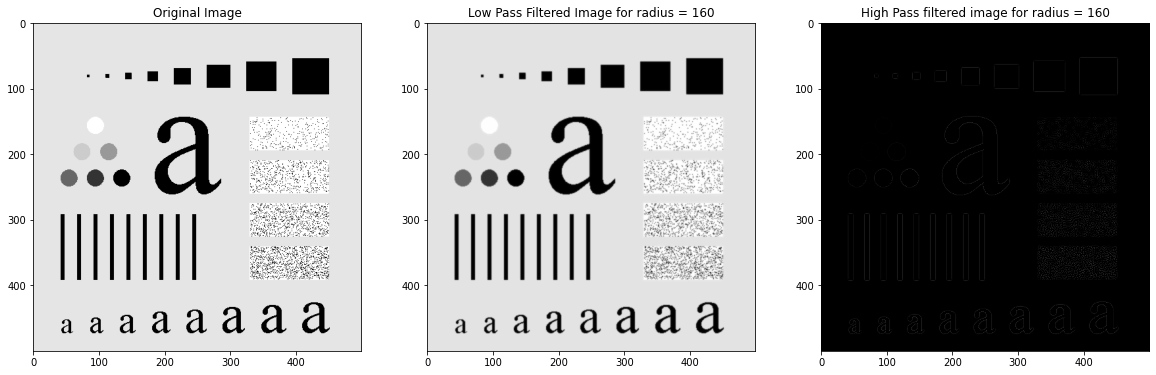

In [30]:
ButterWorth_Filter(img, 160)

### Conclusion

1. We can now implement frequency domain filtering on the given image and comprehend its effects.

2. Low Pass Filtering gives us a blurring effect on images.

3. High Pass Filtering Helps us detect the edges on the images

4. Ideal Filtering gives us a ringing effect - and this problem is solved with Butterworth Filter

5. **As D0 increases, the blurring effect decreases and edges detected are less sharp**

